In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import dython
from dython.nominal import identify_nominal_columns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [3]:
# Read the cleaned dataset
df_encoded= pd.read_csv('cleaned_data.csv')

In [4]:
df_encoded.head()

,age,year,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,_oct,_sep,_fri,_mon,_thu,_tue,_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2008,261,1,-1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
1,57,2008,149,1,-1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
2,37,2008,226,1,-1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
3,40,2008,151,1,-1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
4,56,2008,307,1,-1,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0


In [7]:
#Splitting the data into features and target variable.
X=df_encoded.copy()
y= df_encoded['y'].map({'no': 0, 'yes': 1})
X.drop('y', inplace=True, axis=1)
#X.drop('Subscribed', inplace=True, axis=1)

In [8]:
#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = rf.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))

Accuracy: 0.9260720064724919
f1 score: 0.5462445685909374
recall score: 0.4573804573804574


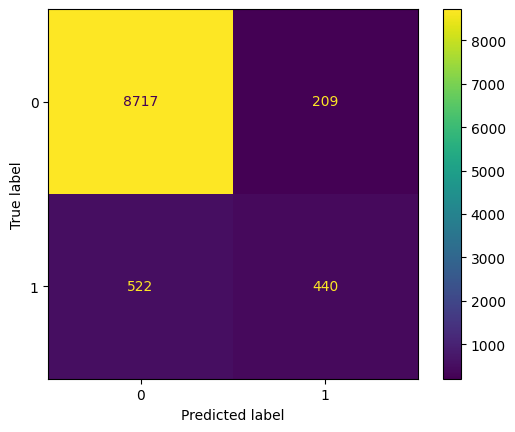

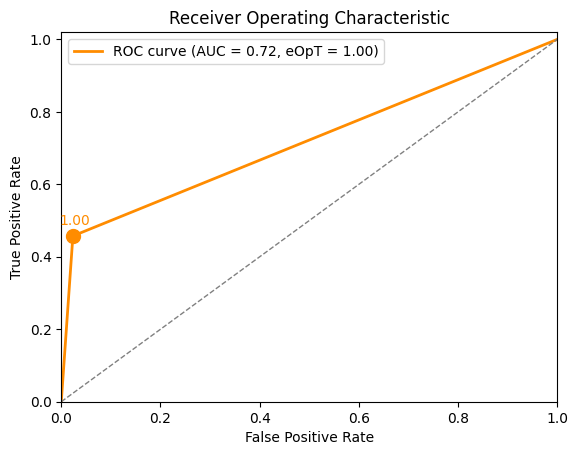

{'0': {'auc': {'val': 0.7169828569671723, 'naive': 0.5},
  'eopt': {'val': 1, 'x': 0.023414743446112482, 'y': 0.4573804573804574}},
 'ax': <Axes: title={'center': 'Receiver Operating Characteristic'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>}

In [12]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

from dython.model_utils import metric_graph

metric_graph(y_test, y_pred, metric='roc')

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


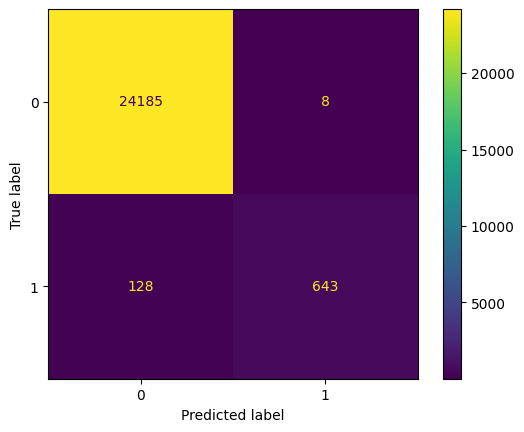

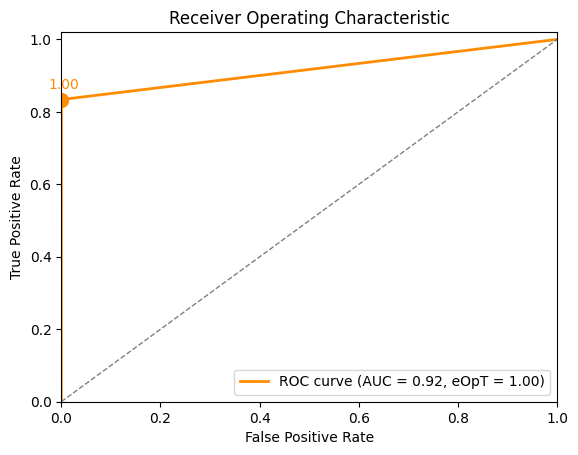

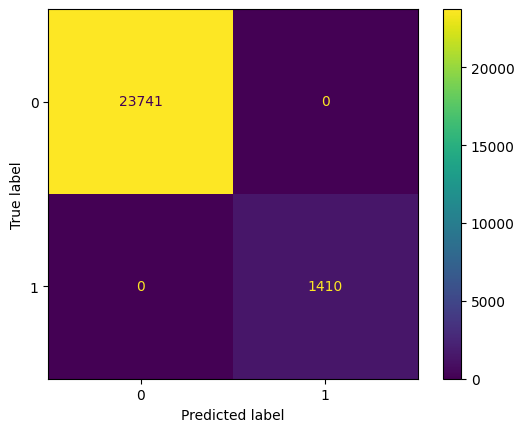

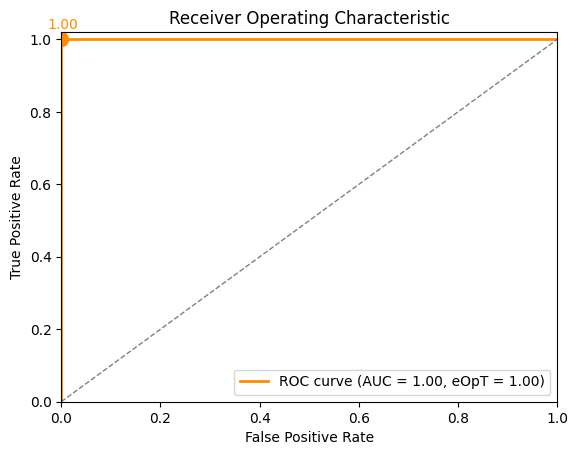

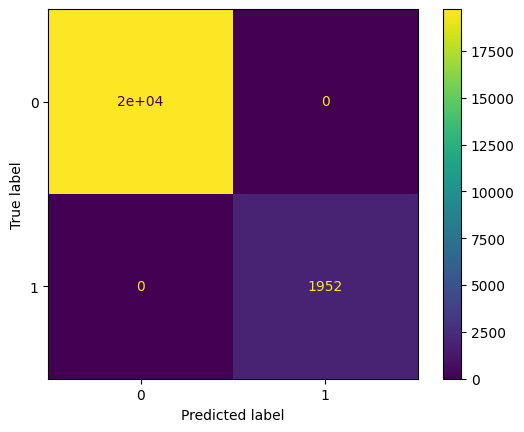

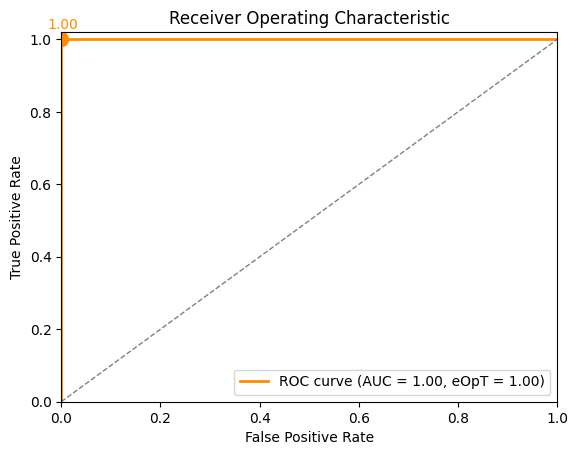

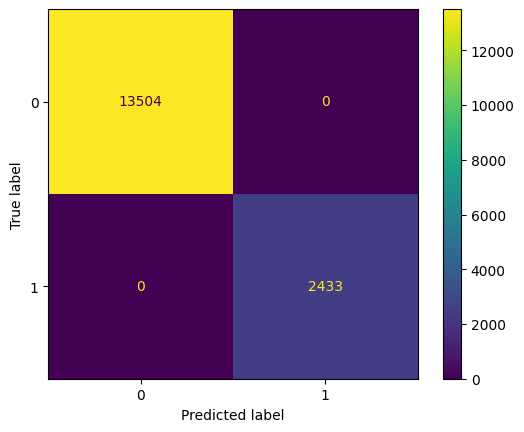

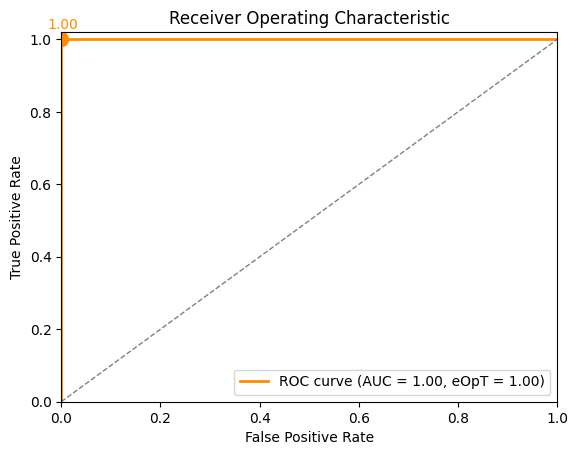

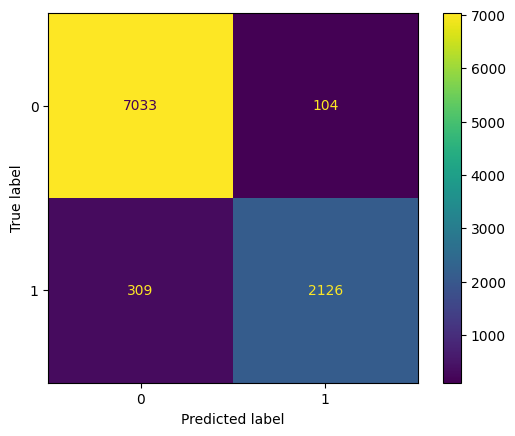

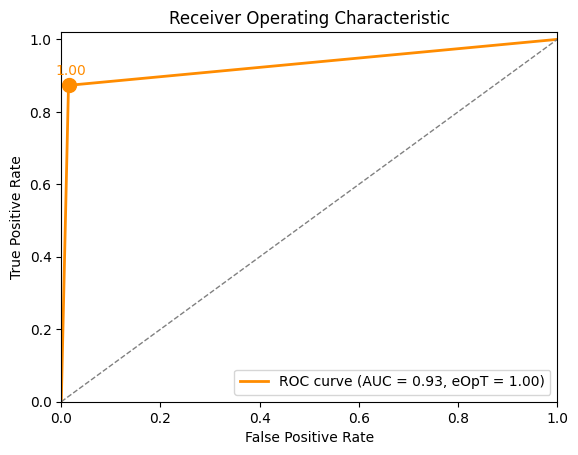

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
print(skf)
accuracy_stratified_by_fold=[]
f1_score_stratified_by_fold=[]
recall_score_stratified_by_fold=[]
rf2 = RandomForestClassifier()

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")
    X_train_fold, X_test_fold = X.iloc[train_index[0]:train_index[-1]], X.iloc[test_index[0]:test_index[-1]] 
    y_train_fold, y_test_fold = y.iloc[train_index[0]:train_index[-1]], y.iloc[test_index[0]:test_index[-1]] 
    rf2.fit(X_train_fold, y_train_fold)
    fold_predictions = rf2.predict(X_test_fold)
    accuracy_stratified_by_fold.append(rf2.score(X_test_fold, y_test_fold))
    #recall_score_stratified_by_fold.append(rf2.recall_score(X_test_fold, y_test_fold))  
    #f1_score_stratified_by_fold.append(rf2.f1_score(X_test_fold, y_test_fold))
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test_fold, fold_predictions)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot();

    from dython.model_utils import metric_graph

    metric_graph(y_test_fold, fold_predictions, metric='roc')

In [26]:
print(accuracy_stratified_by_fold)
print(f1_score_stratified_by_fold)
print(recall_score_stratified_by_fold)

[0.9945922127864124, 1.0, 1.0, 1.0, 0.9567488508148767]
[]
[]


In [29]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C9A6BAB610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C99871E230>})

In [30]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 462}


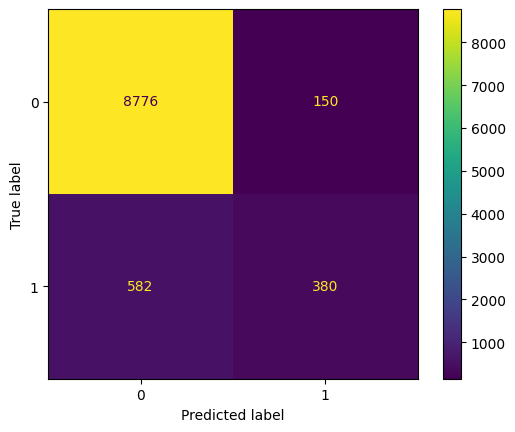

In [31]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

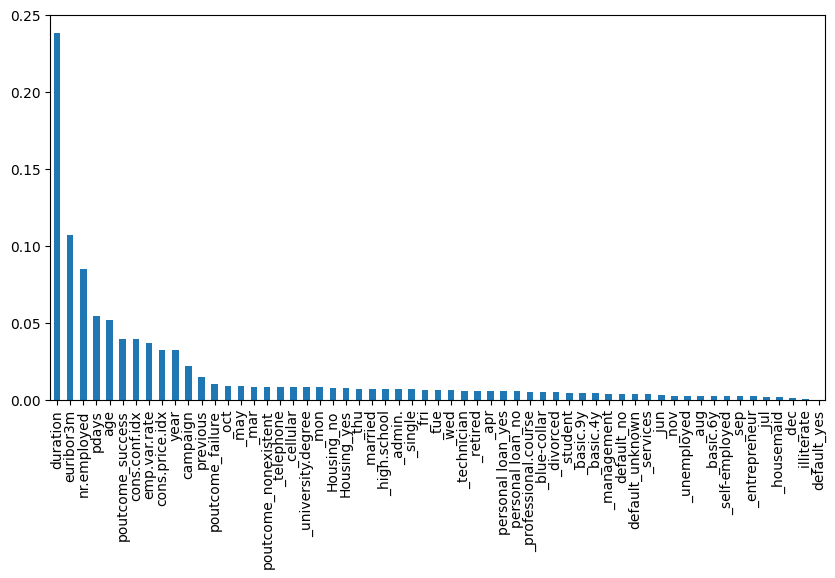

In [32]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar(figsize=(10,5));